## Model underfit

When training a model, a problem called model underfit can occur. This occurs when the model cannot even explain the training data correctly.

* The model is too simple to capture the patterns in the data.
* It cannot even explain the training data.
* This results in low accuracy on both training and test data.

Typical causes:
* Too simple a model (e.g., linear regression line for a non-linear relationship).
* Few parameters
* Lack of training (few epochs for neural networks).

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

To explain the problem, we generate an experimental dataset. 
* X is a randomly generated 
* Y is calculated using the formula Y = -X^2
* The data is biased by random error.

In [ ]:
np.random.seed(0)
X = np.arange(-1, 1, 0.02)
Y = -X**2 + np.random.normal(0, 0.1, len(X))

plt.scatter(X, Y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [ ]:
X.shape

## Linear regression

For the data generated above, we create a linear model, which we have already explained.

We will randomly split the data into test and training data.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

The linear regression function needs X in matrix form. We have it generated as a vector. Therefore, we perform a reshape.

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 1)
X_test = X_test.reshape(X_test.shape[0], 1)

We create a linear model to train.

In [ ]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

Let's list the model parameters and ratings.

In [ ]:
print ("Bias: ", lin_model.intercept_)
print("Váhy: ", lin_model.coef_)

In [ ]:
def print_model_score(Y_train, y_train_predict, label):
    r2 = r2_score(Y_train, y_train_predict)
    rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))    
    print(f"{label} R2 score: {r2}")
    print(f"{label} RMSE: {rmse}")

In [ ]:
Y_predicted = lin_model.predict(X_train)
Y_test_predicted = lin_model.predict(X_test)
print_model_score(Y_train, Y_predicted, "Train")

We can plot the data and the model.

In [ ]:
def visualize_model_2d (X, Y, Y_predicted, title="Linear model", x_label="x", y_label="y"):  
    prediction = np.zeros((X.shape[0], 3))
    prediction[:,0]=X[:,0]
    prediction[:,1]=Y
    prediction[:,2]=Y_predicted
    prediction=prediction[prediction[:, 0].argsort()]    
            
    fig1 = plt.figure() 
    plt.plot (prediction[:,0], prediction[:,2], c='b', label = "Train prediction")
    plt.scatter (prediction[:,0], prediction[:,1], marker = 'x', c='r', label="Train actual")
    plt.title (title)
    plt.ylabel(x_label)
    plt.xlabel(y_label)
    plt.legend()
    plt.show()

In [ ]:

visualize_model_2d(X_train, Y_train, Y_predicted, "Train data")

The linear model is an underfit according to the chart, it does not predict the test data at all.
This is indicated by the R2 score, which is very low.

The same applies to the test data.

In [ ]:
visualize_model_2d(X_test, Y_test, Y_test_predicted, "Test data")
print_model_score(Y_test, Y_test_predicted, "Test")

# Model overfit

The overfit model is a big danger for models that use teacher learning. It can greatly affect performance and the results can be very inaccurate and dangerous in a production environment. 

Overfitting occurs when the model learns too much from the training data and is unable to generalize the underlying information. When this happens, the model is able to describe the training data very accurately, but loses accuracy on every other dataset it has not been trained on. 

This is completely wrong because we want our model to be reasonably good on data it has never seen before. 

In machine learning, simplicity is key. We want to generalize the information obtained from the training dataset, so we can confidently say that we risk overfitting if we use complex models.

Complex models are likely to overlearn from the training data. They think that the random component of the data explains the underlying relationships of the data. 

Complexity is often measured by the number of parameters used by your model during the learning process. For example, the number of parameters in a linear regression, the number of neurons in a neural network, and so on.

The lower the number of parameters, the higher the simplicity and proportionally lower the risk of overfit. 

# Polynominal regression

Polynomial or polynomial regression is an interleaving (approximation) of the given values by a polynomial. 

The coefficients of the search polynomial are calculated by the least squares method so that the sum of the squares of the deviations of the original values from the obtained polynomial is minimal.

Linear regression is actually one of the polynomial regression. 

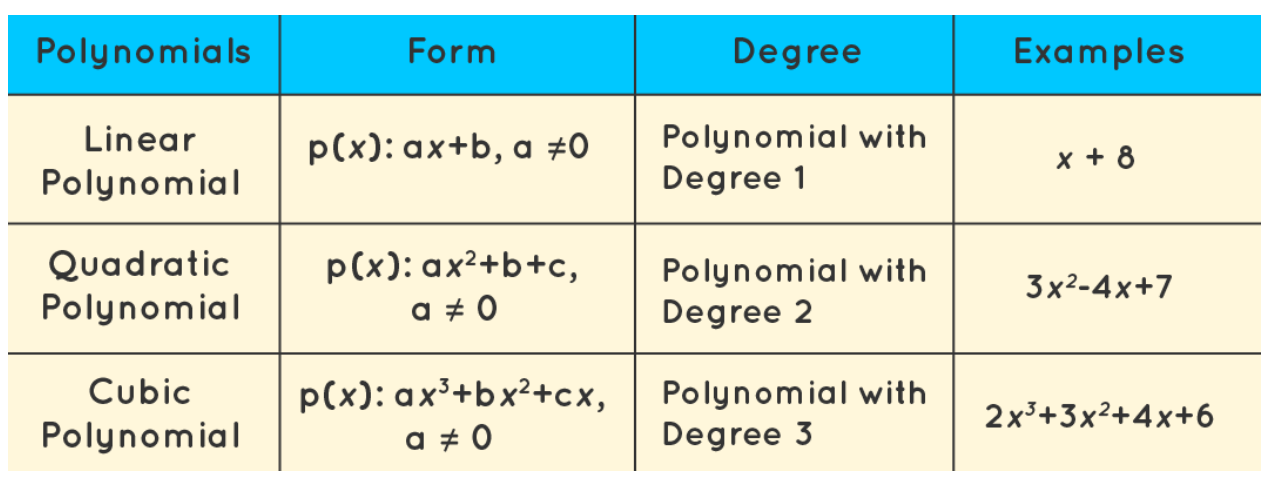

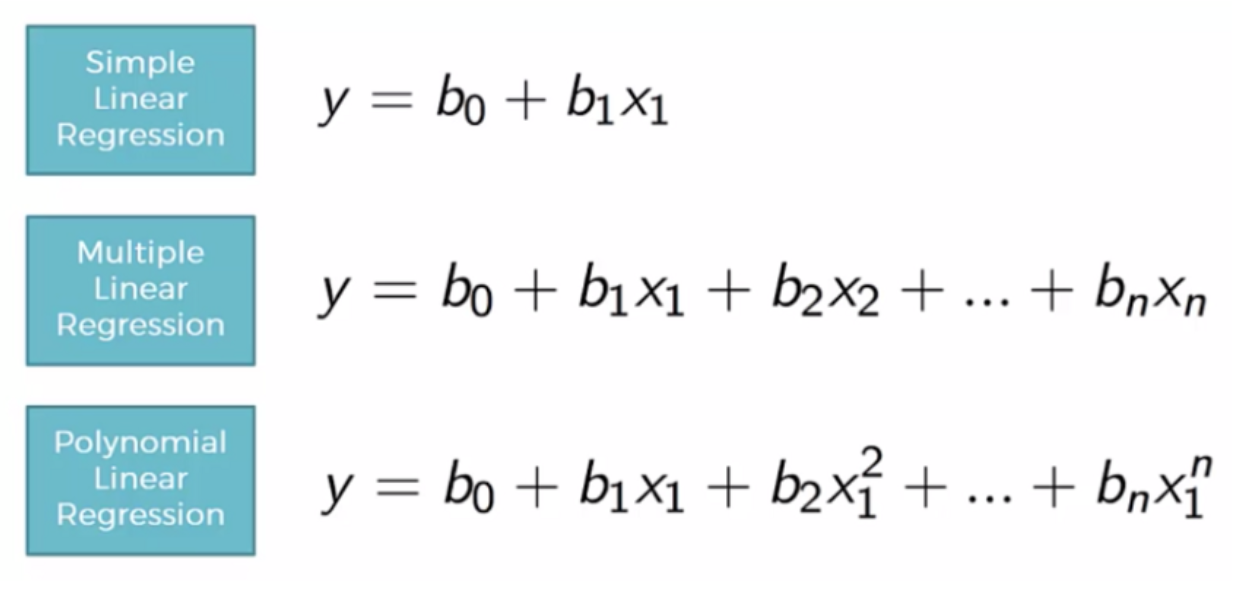

Splitting the dataset into training and testing parts

To show the overfit, the distribution is not random, the training data is mostly the increasing part of the curve, the testing data is the decreasing part

In [ ]:
X_train = X[0:50]
Y_train = Y[0:50]
X_test = X[50:]
Y_test = Y[50:]

To find a polynomial that can be used to interleave the data, use the numpy library. 

Alternatively, the scikit-learn library can be used - from sklearn.preprocessing import PolynomialFeatures.

In [ ]:
def polynomial_fit(X, Y, degree = 1):
    return np.poly1d(np.polyfit(X, Y, degree))

In [ ]:
def visualize_model (p, X_train, Y_train, X_test, Y_test, degree, x_label = "Size", y_label = "Price"):              
    fig1 = plt.figure()    
    plt.scatter (X_train, Y_train, c='r', label="Train ")
    plt.scatter (X_test, Y_test, c='b', label="Test ")
    
    curve_x = np.arange(min(X_train), max(max(X_train), max(X_test)), 0.01)    
    plt.plot(curve_x, p(curve_x), label=f"Polynomial of degree {degree}")  
            
    plt.title ("Model")
    plt.ylabel(x_label)
    plt.xlabel(y_label)
    plt.legend()
    plt.show()

Below are the models for different degrees of the polynomial. It is useful to compare the R2 scores for training and test data.

It can also be seen that the higher the degree of the polynomial, the better it tries to explain the rising data. On the other hand, it then has trouble explaining the decreasing data.

The model with polynomial 2 was able to make a relatively accurate graph even though the input data was not optimally distributed.

In [ ]:
for degree in range (2, 8):
    p = polynomial_fit(X_train, Y_train, degree)  
    visualize_model (p, X_train, Y_train, X_test, Y_test, degree)    
    print("Váhy: ", p.coef)
    print_model_score(Y_train, p(Y_train), "Train")
    print_model_score(Y_test, p(Y_test), "Test")

## Impact of dataset on training

In the previous case, the training and test dataset was not randomly split. If we do this now, the generated models will be more accurate.

Besides the correct choice of the model and its parameters, the presence of different possible data in the training dataset will lead to a more accurate model that will be functional in the production environment.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [ ]:
for degree in range (2, 8):
    p = polynomial_fit(X_train, Y_train, degree)  
    visualize_model (p, X_train, Y_train, X_test, Y_test, degree)
    print_model_score(Y_train, p(Y_train), "Train")
    print_model_score(Y_test, p(Y_test), "Test")